# Census Income Project

# Overview:-

The Census Bureau reports income from several major household surveys and programs. Each differs from the others in some way, such as the length and detail of its questionnaire, the number of households included (sample size), and the methodology used. 

Census money income is defined as income received on a regular basis (exclusive of certain money receipts such as capital gains) before payments for personal income taxes, social security, union dues, medicare deductions, etc. Therefore, money income does not reflect the fact that some families receive part of their income in the form of noncash benefits, such as food stamps, health benefits, subsidized housing, and goods produced and consumed on the farm. In addition, money income does not reflect the fact that noncash benefits are also received by some nonfarm residents which may take the form of the use of business transportation and facilities, full or partial payments by business for retirement programs, medical and educational expenses, etc.

Data users should consider these elements when comparing income levels. Moreover, users should be aware that for many different reasons there is a tendency in household surveys for respondents to underreport their income. Based on an analysis of independently derived income estimates, the Census Bureau determined that respondents report income earned from wages or salaries much better than other sources of income and that the reported wage and salary income is nearly equal to independent estimates of aggregate income.

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


# Software & Hardware Requirements:-

We have used Python and Jupyter Notebook to compute the majority of this case study. Packages and libraries used in this project are:-

1- Pandas (data analysis)

2- Numpy (matrix computation)

3- Matplotlib.pyplot (Visualization)

4- Seaborn (visualization)

5- Scikit-Learn (Machine Learning)

6- Scipy (Z-score)

7- Joblib (saving final model)

8- Warnings (filter warnings) & etc. Microsoft Excel ( for calculations and Data Handling)

Processor used:- Intel I3

O/s used: 64bit Windows 10

RAM:4GB

# Dataset Information:-
Dataset provided by client in *.csv format.

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

Listing of attributes:

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, 
Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


# Aim of this Project:-
The prediction task is to determine whether a person makes over $50K a year. Our Target variable Income is Categorical in nature so we wil use Classification algorithms to make our model.

# Steps used in this project:-
1- Define the Problem

2- Data Gathering

3- Data Cleaning

4- Data Exploration and Visualization

5- Train the algorithm

6- Evaluate our model using evaluation metrics & etc.

In [67]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [68]:
#importing dataset
df=pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [69]:
#Head of our Dataset
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [70]:
#Tail of our Dataset
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [71]:
#shape of our Dataset
print("Shape of our dataset is ",df.shape)
print("Column count in our dataset is",df.shape[1])
print("Row count in our dataset is ",df.shape[0])

Shape of our dataset is  (32560, 15)
Column count in our dataset is 15
Row count in our dataset is  32560


In [72]:
#Let's check type of data in our Dataset
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [73]:
#Checking null values in Dataset
print("Empty cells in Dataset is ",df.isna().values.any())
print("\nColumnwise Empty cell analysis\n")
print(df.isna().sum())
print("\nPlease see the detail below:-")
df.isna()

Empty cells in Dataset is  False

Columnwise Empty cell analysis

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Please see the detail below:-


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [74]:
#Let's check our columns in detail
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [75]:
#Concise Summary of our DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [76]:
#Let's check unique values in each column to exolre dataset more deeply
print("Column-wise Unique values are as:-")
for column in df.columns.values:
    print("\n Unique values in ",column," column is " ,df[column].nunique())

Column-wise Unique values are as:-

 Unique values in  Age  column is  73

 Unique values in  Workclass  column is  9

 Unique values in  Fnlwgt  column is  21647

 Unique values in  Education  column is  16

 Unique values in  Education_num  column is  16

 Unique values in  Marital_status  column is  7

 Unique values in  Occupation  column is  15

 Unique values in  Relationship  column is  6

 Unique values in  Race  column is  5

 Unique values in  Sex  column is  2

 Unique values in  Capital_gain  column is  119

 Unique values in  Capital_loss  column is  92

 Unique values in  Hours_per_week  column is  94

 Unique values in  Native_country  column is  42

 Unique values in  Income  column is  2


In [77]:
#checking size of dataFrame
df.size

488400

In [78]:
#checking Non-numerical type data in our dataset
for i in df.columns:
    if df[i].dtype=="object":
        print("Object type features in dataset: ",i)

Object type features in dataset:  Workclass
Object type features in dataset:  Education
Object type features in dataset:  Marital_status
Object type features in dataset:  Occupation
Object type features in dataset:  Relationship
Object type features in dataset:  Race
Object type features in dataset:  Sex
Object type features in dataset:  Native_country
Object type features in dataset:  Income


Observations:-

1-Dataset has no missing values.

2-9 Columns have non-numerical data type.

# Exploring Target Variable

In [79]:
df.Income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [80]:
df.Income.value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

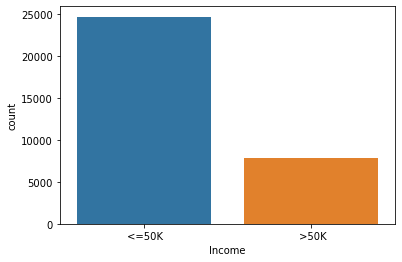

In [81]:
#Lets check the Income value counts using countplot
sns.countplot(x="Income",data=df)
plt.show()

Observation:
    
Count of <=50K is more than >50K.

# Data Visualizations

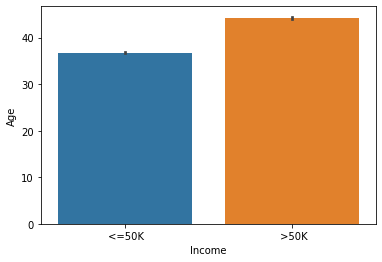

In [82]:
#Lets check impact of age on Income
sns.barplot(x="Income",y="Age",data=df)
plt.show()

In [83]:
df.Age.values

array([50, 38, 53, ..., 58, 22, 52], dtype=int64)

Observation:

Category >50K have higher age range.

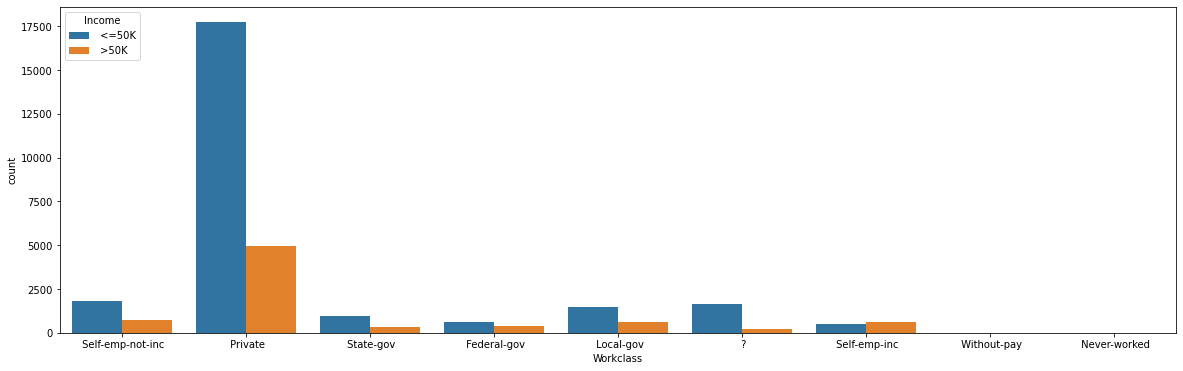

In [84]:
#Lets check impact of Workclass on Income
plt.figure(figsize=(20,6))
sns.countplot(x="Workclass",data=df,hue="Income")
plt.show()

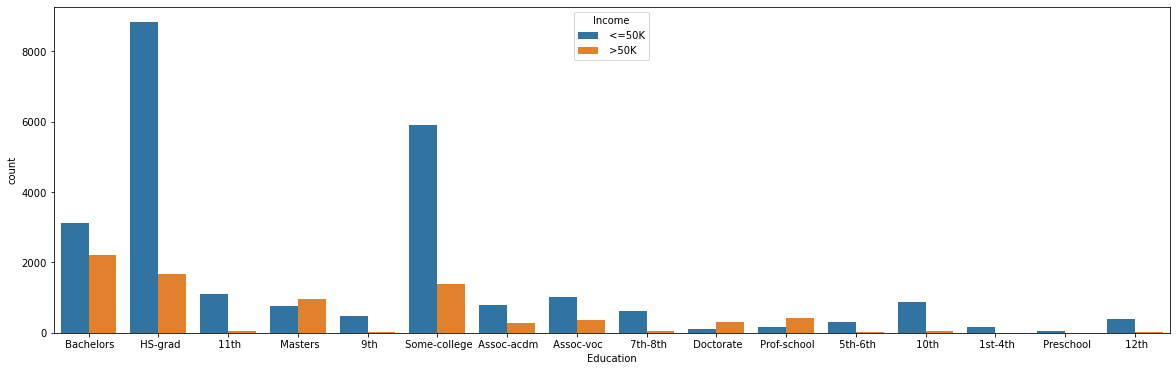

In [85]:
#Lets check impact of Education on Income
plt.figure(figsize=(20,6))
sns.countplot(x="Education",data=df,hue="Income")
plt.show()

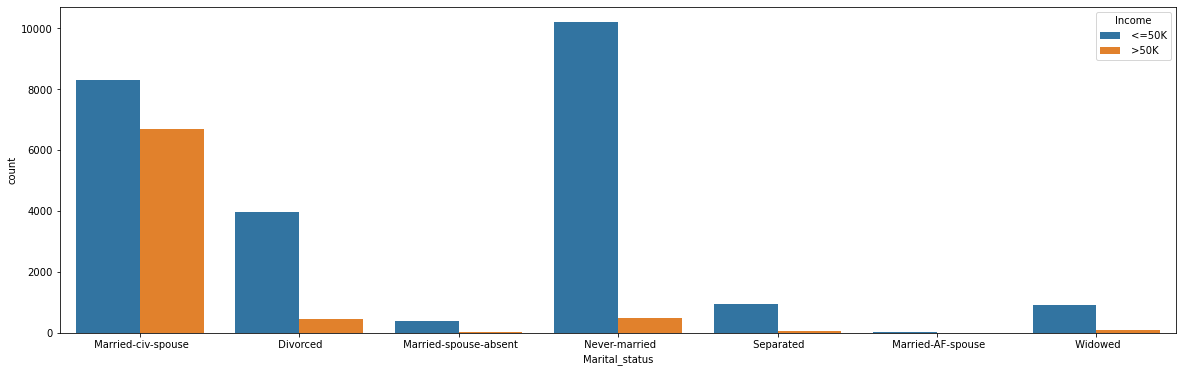

In [86]:
#Lets check impact of Marital_statusn on Income
plt.figure(figsize=(20,6))
sns.countplot(x="Marital_status",data=df,hue="Income")
plt.show()

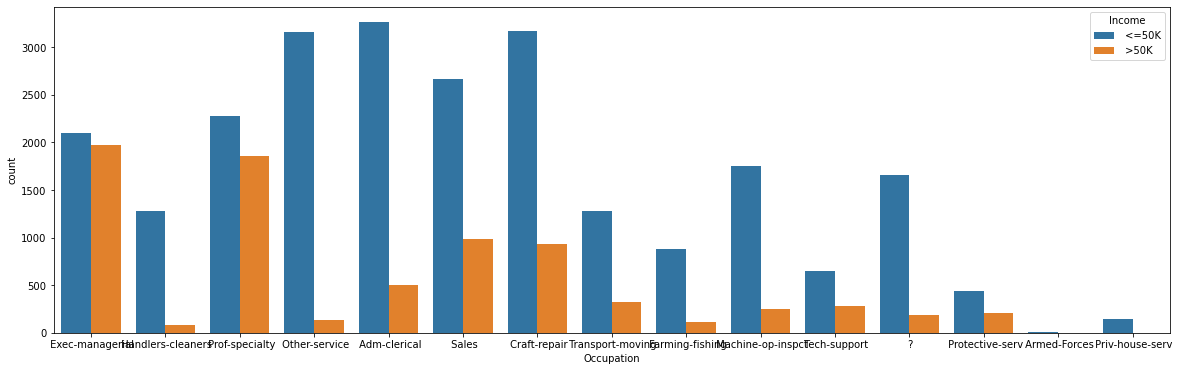

In [87]:
#Lets check impact of Occupation on Income
plt.figure(figsize=(20,6))
sns.countplot(x="Occupation",data=df,hue="Income")
plt.show()

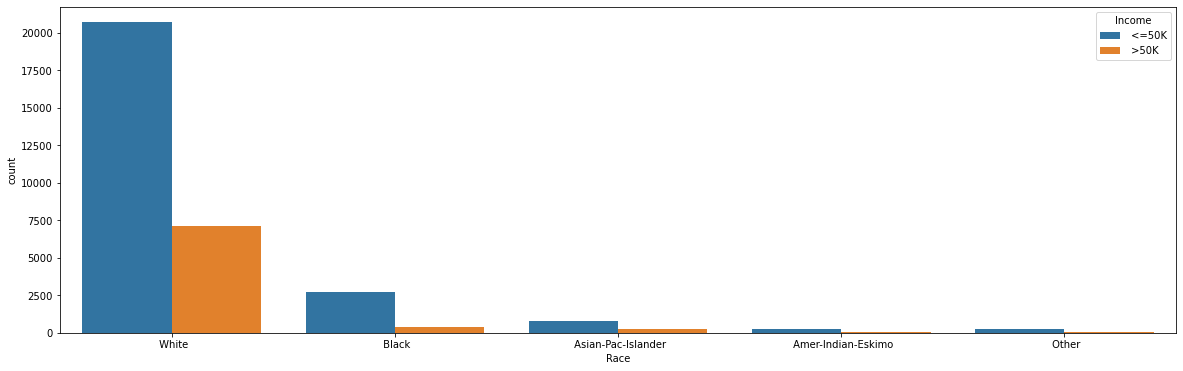

In [88]:
#Lets check impact of Race on Income
plt.figure(figsize=(20,6))
sns.countplot(x="Race",data=df,hue="Income")
plt.show()

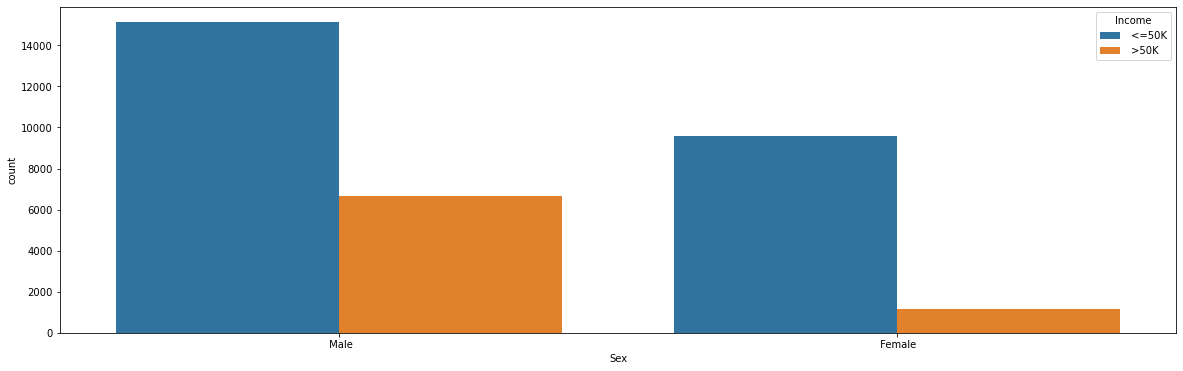

In [89]:
#Lets check impact of Sex on Income
plt.figure(figsize=(20,6))
sns.countplot(x="Sex",data=df,hue="Income")
plt.show()

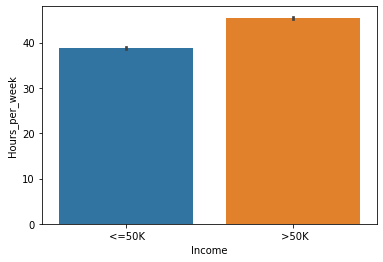

In [90]:
#Lets check impact of Hours_per_week on Income
sns.barplot(x="Income",y="Hours_per_week",data=df)
plt.show()

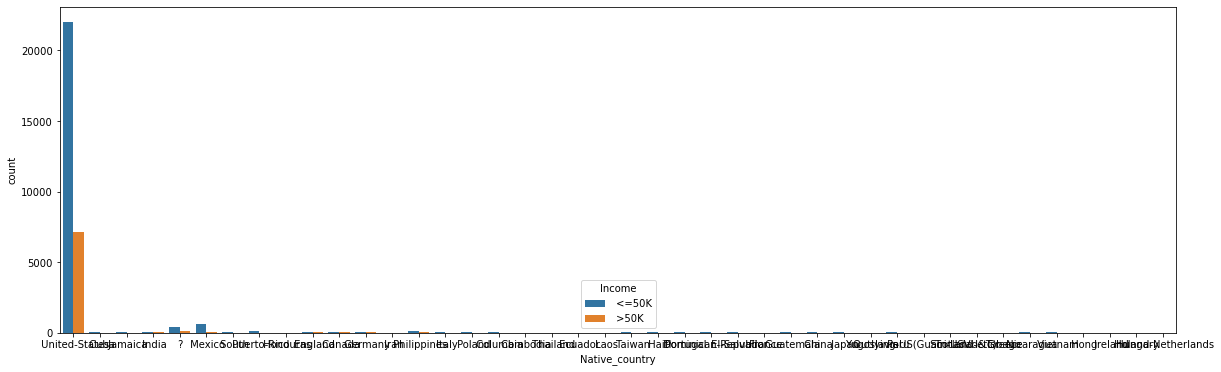

In [91]:
#Lets check impact of Native_country on Income
plt.figure(figsize=(20,6))
sns.countplot(x="Native_country",data=df,hue="Income")
plt.show()

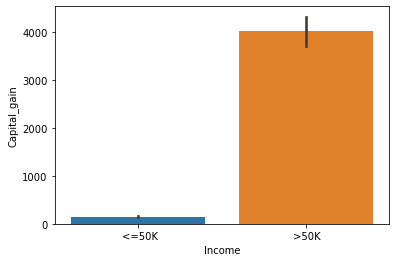

In [92]:
#Lets check impact of Capital_gain on Income
sns.barplot(x="Income",y="Capital_gain",data=df)
plt.show()

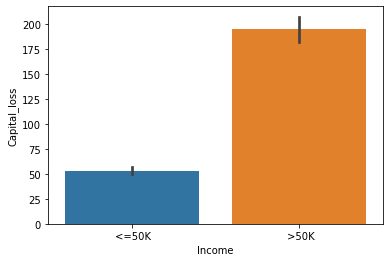

In [93]:
#Lets check impact of Capital_loss on Income
sns.barplot(x="Income",y="Capital_loss",data=df)
plt.show()

Observation:
    
Columns Workclass,Capital_gain,Education,Occupation & Native_country have high impact on income.


<AxesSubplot:>

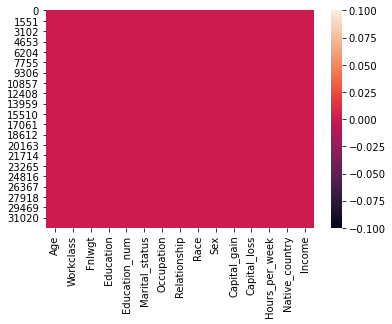

In [94]:
#To check missing values using Seaborn Heatmap
sns.heatmap(df.isnull())

Observation:-

Dataset has no missing values.

# Feature Engineering

In [95]:
#Encoding Target variable in to numerical format for better processing using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Income"]=le.fit_transform(df["Income"])
df["Income"]                                                         

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

In [96]:
#checking Non-numerical type data in our dataset after updation
for i in df.columns:
    if df[i].dtype=="object":
        print("Object type features in dataset: ",i)

Object type features in dataset:  Workclass
Object type features in dataset:  Education
Object type features in dataset:  Marital_status
Object type features in dataset:  Occupation
Object type features in dataset:  Relationship
Object type features in dataset:  Race
Object type features in dataset:  Sex
Object type features in dataset:  Native_country


In [97]:
#Encoding object type data in to numerical format for better processing using label encoder
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=le.fit_transform(df[i].astype(str))

In [98]:
#checking updated dataset
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [99]:
#Removing Column "Education_num" as it have same type of data in education column.
df.drop('Education_num',axis=1,inplace=True)

In [100]:
#Shape & data types of our Dataset after removal of columns
print("Shape of our dataset is ",df.shape)
df.dtypes

Shape of our dataset is  (32560, 14)


Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

# SUMMARY STATISTICS

In [101]:
#Lets describe the dataset
df.describe()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [102]:
#checking Transpose of Statistical summary to get better understanding:-
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Workclass,32560.0,3.868796,1.455879,0.0,4.0,4.0,4.0,8.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education,32560.0,10.298249,3.870317,0.0,9.0,11.0,12.0,15.0
Marital_status,32560.0,2.611794,1.506225,0.0,2.0,2.0,4.0,6.0
Occupation,32560.0,6.572912,4.228809,0.0,3.0,7.0,10.0,14.0
Relationship,32560.0,1.446376,1.606794,0.0,0.0,1.0,3.0,5.0
Race,32560.0,3.665848,0.848817,0.0,4.0,4.0,4.0,4.0
Sex,32560.0,0.669195,0.470510,0.0,0.0,1.0,1.0,1.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0


Observations on basis of Summary Statistics:-
    
1-we can see huge difference between min and max specially in capital_gain and capital_loss columns.

2-Count of every columns is 32560 and there are no missing values.

# Correlation Matrix

In [103]:
#Let's check correlation in our Dataset
dfcor=df.corr()
dfcor

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995
Capital_gain,0.077674,0.033828,0.000437,0.030047,-0.043398,0.025511,-0.057918,0.011143,0.048477,1.000000,-0.031614,0.078409,-0.001984,0.223333


<AxesSubplot:>

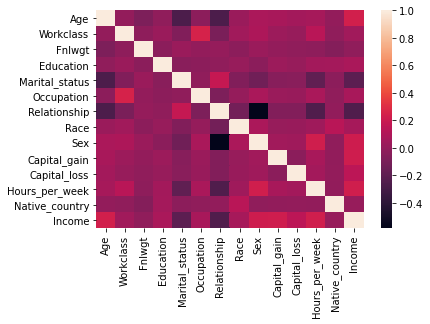

In [104]:
#checking correlation using Heatmap
sns.heatmap(dfcor)

<AxesSubplot:>

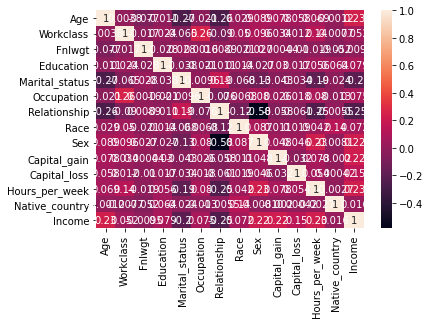

In [105]:
#Heatmap with annotations & color_palette
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,annot=True)

<AxesSubplot:>

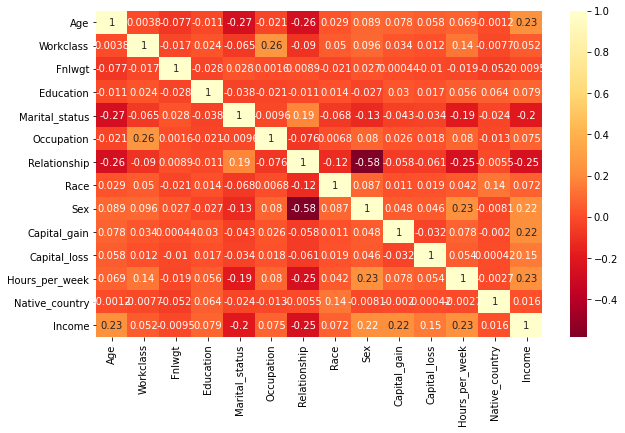

In [106]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)  

Observations on basis of Correlation Matrix & Heatmaps:-

1- Dark shades are highly correlated.

2- Income is highly correlate with Age,Education_num,sex,Capital_gain and Hours_per_week. 

3-  Income is least correlate with Marital_status and Relationship.

# Plotting Outliers

Age                  AxesSubplot(0.125,0.772143;0.110714x0.107857)
Workclass         AxesSubplot(0.257857,0.772143;0.110714x0.107857)
Fnlwgt            AxesSubplot(0.390714,0.772143;0.110714x0.107857)
Education         AxesSubplot(0.523571,0.772143;0.110714x0.107857)
Marital_status    AxesSubplot(0.656429,0.772143;0.110714x0.107857)
Occupation        AxesSubplot(0.789286,0.772143;0.110714x0.107857)
Relationship         AxesSubplot(0.125,0.642714;0.110714x0.107857)
Race              AxesSubplot(0.257857,0.642714;0.110714x0.107857)
Sex               AxesSubplot(0.390714,0.642714;0.110714x0.107857)
Capital_gain      AxesSubplot(0.523571,0.642714;0.110714x0.107857)
Capital_loss      AxesSubplot(0.656429,0.642714;0.110714x0.107857)
Hours_per_week    AxesSubplot(0.789286,0.642714;0.110714x0.107857)
Native_country       AxesSubplot(0.125,0.513286;0.110714x0.107857)
Income            AxesSubplot(0.257857,0.513286;0.110714x0.107857)
dtype: object

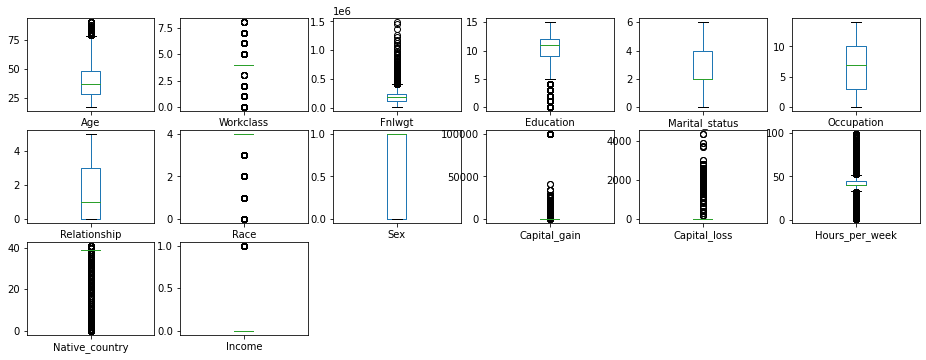

In [107]:
#univariate analysis
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(16,12))

Observation:
    
Outliers present in many columns.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Workclass'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Marital_status'}>,
        <AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Relationship'}>,
        <AxesSubplot:title={'center':'Race'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>],
       [<AxesSubplot:title={'center':'Native_country'}>,
        <AxesSubplot:title={'center':'Income'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

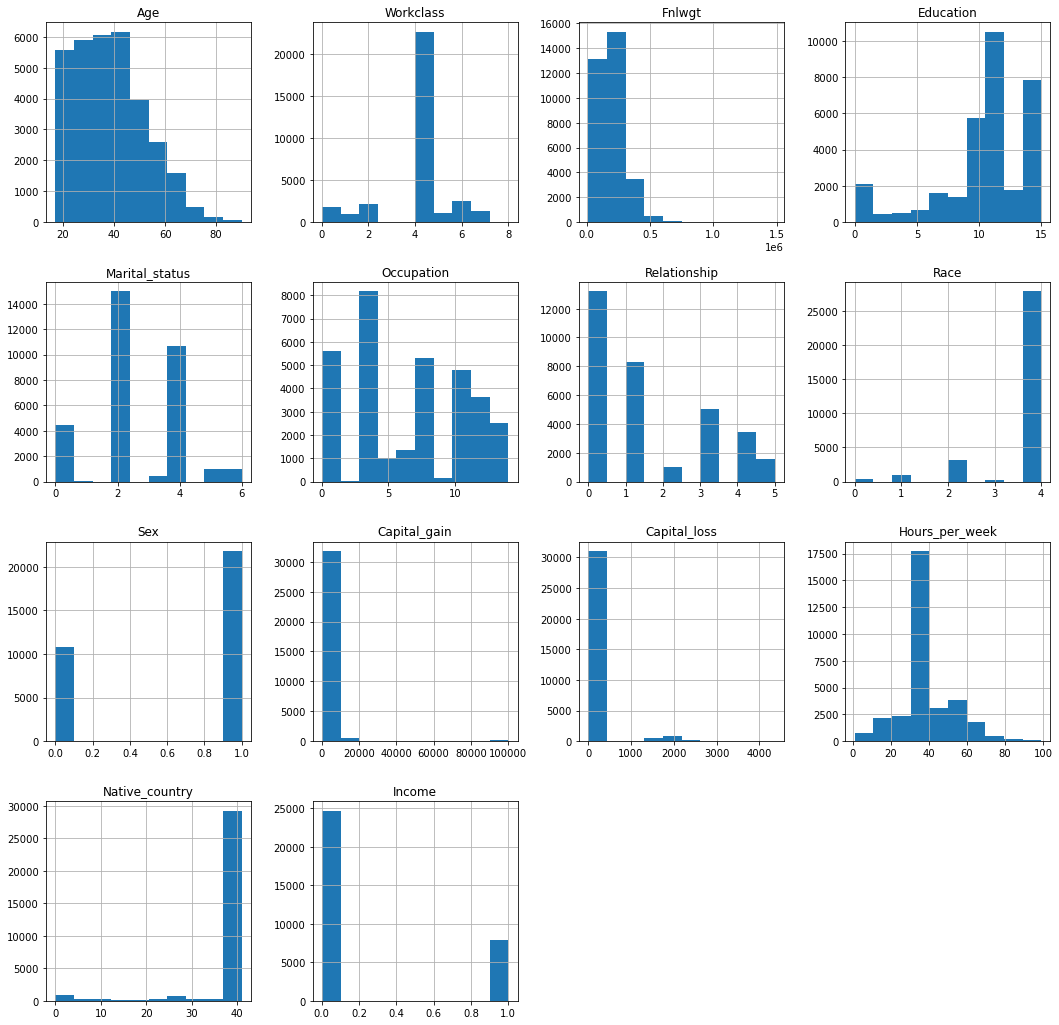

In [108]:
# histogram of individual feature
df.hist(figsize=(18,18),grid=True)

Observations:

Presence of unusual values in above histograms & also distribution is not normal in some columns and these things denote the possibility of potential outliers.

To check Distribution of Skewness

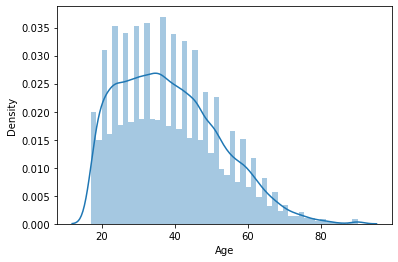

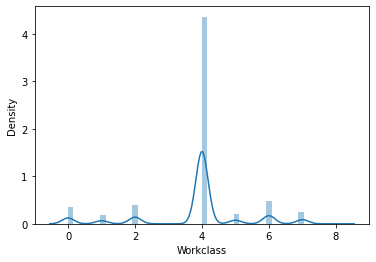

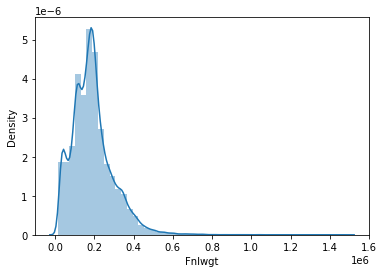

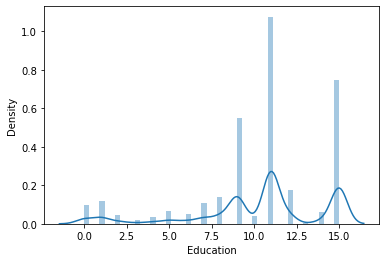

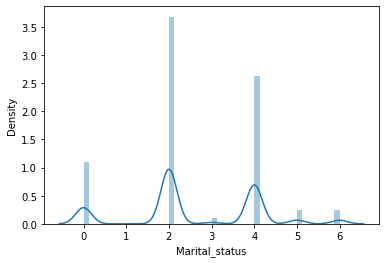

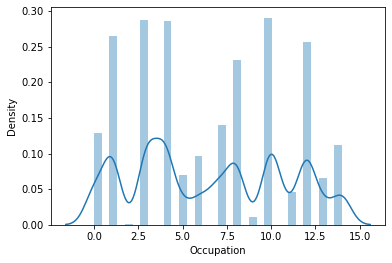

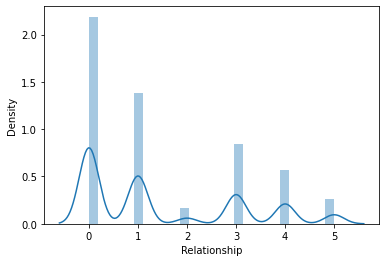

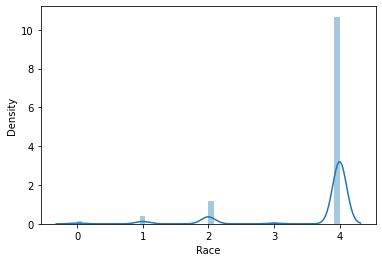

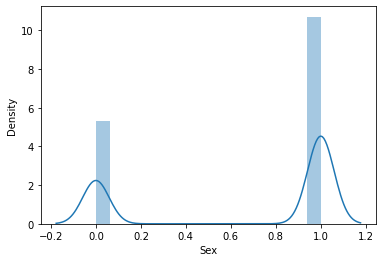

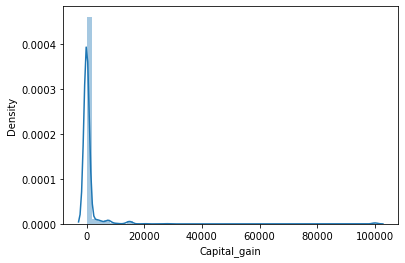

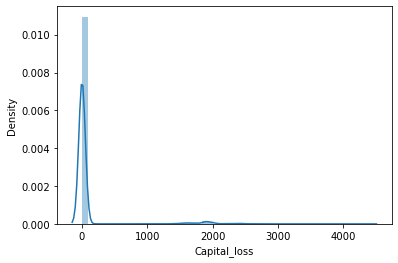

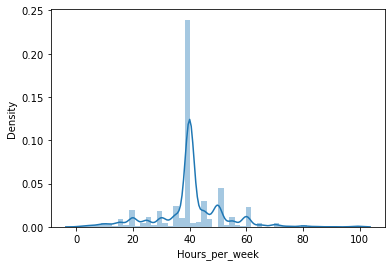

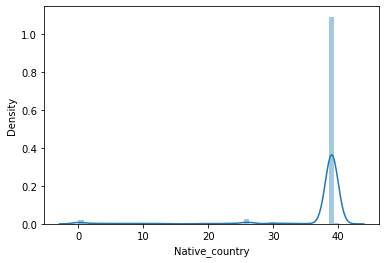

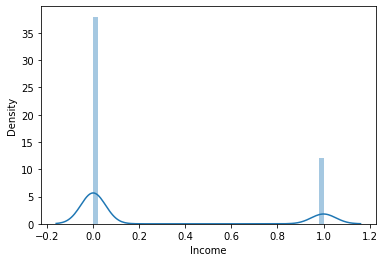

In [109]:
#Distplot for individual columns
for i in df.columns:
    if (df[i].dtypes !="object"):
        plt.subplots()
        sns.distplot(df[i],label = i)

Observation:

Huge Skewness present in some columns.

Multivariate Analysis

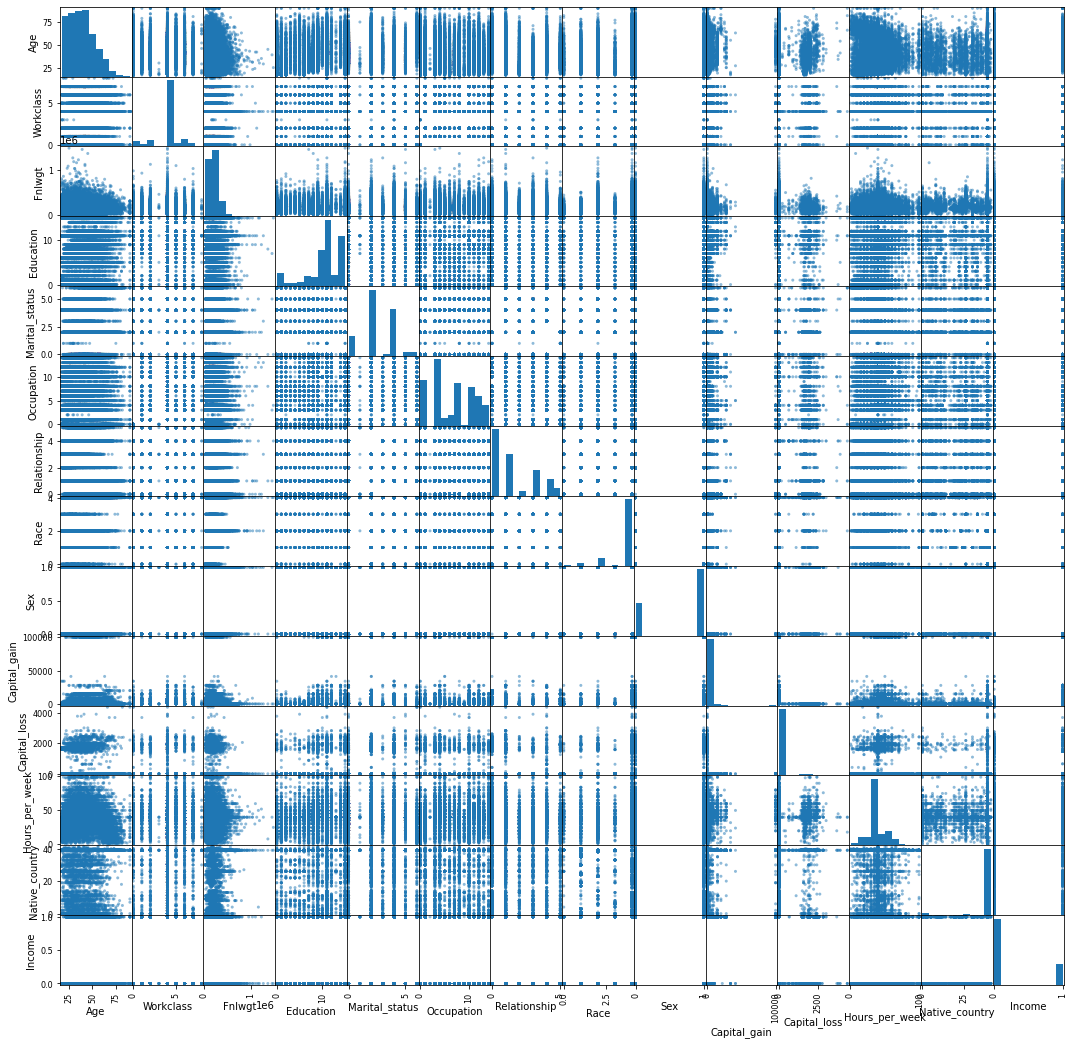

In [110]:
#Scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(18,18),grid=True)
plt.show()

Observation:

Using multivariate analysis we can look at the interactions between the variables.Scatterplots of all pair of attributes helps us to spot structured relationship between input variables.

# Removing Outliers

In [111]:
#Lets remove the outliers using z scores
from scipy.stats import zscore
zs=np.abs(zscore(df))
print(zs.shape)

(32560, 14)


In [112]:
#checking which data have zscore is more than 3
print(np.where(zs>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([12, 11,  7, ...,  7,  7,  7], dtype=int64))


In [113]:
#Dropping Outliers
df1=df.loc[(abs(zs)<3).all(axis=1)]
print(df1.shape)

(27561, 14)


Observation:

So, as per above shapes: 32560-27561=4,999 so 4,999 outliers are removed.

In [124]:
#Lets divide dataset into input and output
x=df1.drop("Income",axis=1)
x.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,83311,9,2,4,0,4,1,0,0,13,39
1,38,4,215646,11,0,6,1,4,1,0,0,40,39
2,53,4,234721,1,2,6,0,2,1,0,0,40,39
4,37,4,284582,12,2,4,5,4,0,0,0,40,39
5,49,4,160187,6,3,8,1,2,0,0,0,16,23


In [125]:
#Output feature
y=df1["Income"]
y.head()

0    0
1    0
2    0
4    0
5    0
Name: Income, dtype: int32

In [126]:
print("shape ofx->",x.shape)
print("shape of y->",y.shape)

shape ofx-> (27561, 13)
shape of y-> (27561,)


# Skewness

In [127]:
#Lets chcek the skewness of the input dataset
x.skew()

Age                0.481894
Workclass         -0.740966
Fnlwgt             0.624658
Education         -0.944964
Marital_status    -0.042647
Occupation         0.131546
Relationship       0.752376
Race              -2.589087
Sex               -0.687149
Capital_gain       4.946239
Capital_loss      29.402904
Hours_per_week    -0.355987
Native_country    -5.229001
dtype: float64

In [128]:
#Let's check Number of features having skewness more than 0.55
print(len(x.skew().loc[x.skew()>0.55]))

4


Observation:
    
4 Columns have high skewness.

In [129]:
#Lets treat above skewness using cube root transformation
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [130]:
#lets again check the skewness
x.skew()

Age                0.481894
Workclass         -0.740966
Fnlwgt            -0.384450
Education         -0.944964
Marital_status    -0.042647
Occupation         0.131546
Relationship      -0.134477
Race              -2.589087
Sex               -0.687149
Capital_gain       3.377456
Capital_loss      25.529614
Hours_per_week    -0.355987
Native_country    -5.229001
dtype: float64

In [131]:
#Let's again check Number of features having skewness more than 0.55
print(len(x.skew().loc[x.skew()>0.55]))

2


# Preprocessing

In [132]:
#Lets do the preprocessing to bring features to common scale
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x1=ss.fit_transform(x)
x1=pd.DataFrame(x1,columns=x.columns)
x1.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.878821,1.475687,-1.115923,-0.337287,-0.404382,-0.599549,-1.171040,0.344545,0.713814,-0.287922,-0.039933,-2.409410,0.201665
1,-0.014507,0.093505,0.449909,0.175934,-1.720222,-0.127794,0.331708,0.344545,0.713814,-0.287922,-0.039933,0.009312,0.201665
2,1.102153,0.093505,0.615066,-2.390171,-0.404382,-0.127794,-1.171040,-2.958983,0.713814,-0.287922,-0.039933,0.009312,0.201665
3,-0.088951,0.093505,1.008216,0.432544,-0.404382,-0.599549,1.398622,0.344545,-1.400926,-0.287922,-0.039933,0.009312,0.201665
4,0.804377,0.093505,-0.093854,-1.107119,0.253538,0.343962,0.331708,-2.958983,-1.400926,-0.287922,-0.039933,-2.140663,-5.476735


In [133]:
x1.shape

(27561, 13)

In [134]:
y.shape

(27561,)

# Evaluate Some Algorithms

In [135]:
#splitting data in to Training & Test Sets and check at random_state=42
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
x_train,x_test,y_train,y_test = train_test_split(x1,y,random_state=42,test_size=0.20,stratify=y)
print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (22048, 13)
Training target vector size: (22048,)
Test feature matrix size: (5513, 13)
Test target vector size: (5513,)


In [136]:
# Calculating accuracy score and best random state correspondingly
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
def mac_score(rgn,x1,y):
    mac_score=0
    fr_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.20,random_state=r_state,stratify=y)
        rgn.fit(x_train,y_train)
        ypred=rgn.predict(x_test)
        acc_score=accuracy_score(y_test,ypred)
        if acc_score > mac_score:
            mac_score=acc_score
            fr_state=r_state
    print('Maximum Accuracy Score corresponding to Random State ', fr_state, 'is -->', mac_score,'\n')
    return fr_state

In [137]:
# Importing machine learning Libraries from sklearn & XGBoost
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

In [138]:
#Model list
rfc=RandomForestClassifier()
dt=DecisionTreeClassifier()
logr=LogisticRegression()
grb=GradientBoostingClassifier()
kc=KNeighborsClassifier()
svc=SVC()
adb=AdaBoostClassifier()
model=['RandomForest Classifier','DecisionTree Classifier','LogisticRegression Classifier','GradientBoosting Classifier','KNeighborsClassifier','Support Vector Classifier','AdaBoost Classifier']

In [139]:
# creating empty lists to store performance score
Lscore=[]
Ascore=[]
Cvscore=[]
fscore=[]
RAC=[]
Logloss=[]

Maximum Accuracy Score corresponding to Random State  85 is --> 0.8619626337747143 

Results after applying RandomForest Classification
Learning Score is 0.9999092888243831
F1 score is 0.6303142329020333
Accuracy is 85.49 %
Accuracy Score is:  0.8548884454924723
Cross Validation Score is :  0.8531623422737636
log_loss is :  5.012012228202138
roc auc score is :  0.7479328726337294
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      4284
           1       0.73      0.55      0.63      1229

    accuracy                           0.85      5513
   macro avg       0.80      0.75      0.77      5513
weighted avg       0.85      0.85      0.85      5513

Confusion Matrix:
 [[4031  253]
 [ 547  682]]


Text(0.5, 0, 'False_positive_rate')

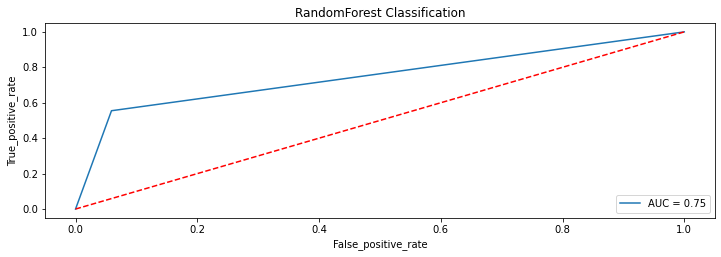

In [140]:
#Applying RandomForest Classification
r_state=mac_score(rfc,x1,y)
rfc=RandomForestClassifier(n_estimators=100,random_state=r_state)
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.20,stratify=y)
rfc.fit(x_train,y_train)
ypred=rfc.predict(x_test)
print("Results after applying RandomForest Classification")
#Learning Score, F1 Score, Accuracy
print("Learning Score is",rfc.score(x_train,y_train))
Lscore.append(rfc.score(x_train,y_train))
print("F1 score is",metrics.f1_score(y_test,ypred))
fscore.append(metrics.f1_score(y_test,ypred))
print("Accuracy is",(round(rfc.score(x_test,y_test)*100,2)),"%")
#accuracy score
acc_score=accuracy_score(y_test,ypred)
print('Accuracy Score is: ',acc_score)
Ascore.append(acc_score)
#cross validation score
cvscore=cross_val_score(rfc,x1,y,cv=10,scoring='accuracy').mean()
print('Cross Validation Score is : ',cvscore)
Cvscore.append(cvscore)
#Log_Loss
logloss = log_loss(y_true = y_test, y_pred = ypred)
print('log_loss is : ', logloss)
Logloss.append(logloss)
#Roc auc score 
false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,ypred)
roc_auc=auc(false_positive_rate, true_positive_rate)
print('roc auc score is : ', roc_auc)
RAC.append(roc_auc)
print('Classification Report:\n',classification_report(y_test,ypred))
print('Confusion Matrix:\n',confusion_matrix(y_test,ypred))
plt.figure(figsize=(12,38))
plt.subplot(911)
plt.title('RandomForest Classification')
plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True_positive_rate')
plt.xlabel('False_positive_rate') 

Maximum Accuracy Score corresponding to Random State  62 is --> 0.8162524941048431 

Results after applying Decision Tree Classification
Learning Score is 0.9999546444121916
F1 score is 0.5949008498583569
Accuracy is 81.84 %
Accuracy Score is:  0.818429167422456
Cross Validation Score is :  0.8056672868060349
log_loss is :  6.271307920769582
roc auc score is :  0.7398499269520664
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      4284
           1       0.59      0.60      0.59      1229

    accuracy                           0.82      5513
   macro avg       0.74      0.74      0.74      5513
weighted avg       0.82      0.82      0.82      5513

Confusion Matrix:
 [[3777  507]
 [ 494  735]]


Text(0.5, 0, 'False_positive_rate')

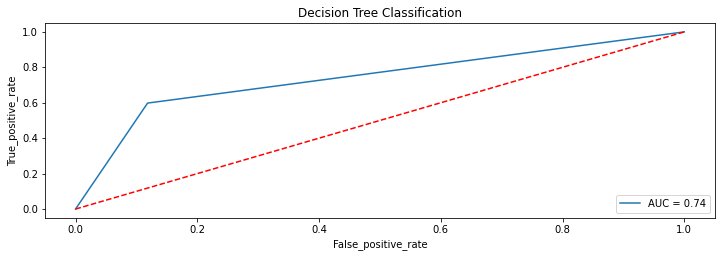

In [141]:
#Applying Decision Tree Classification
r_state=mac_score(dt,x1,y)
dt=DecisionTreeClassifier(random_state=r_state)
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.20,stratify=y)
dt.fit(x_train,y_train)
ypred=dt.predict(x_test)
print("Results after applying Decision Tree Classification")
#Learning Score, F1 Score, Accuracy
print("Learning Score is",dt.score(x_train,y_train))
Lscore.append(dt.score(x_train,y_train))
print("F1 score is",metrics.f1_score(y_test,ypred))
fscore.append(metrics.f1_score(y_test,ypred))
print("Accuracy is",(round(dt.score(x_test,y_test)*100,2)),"%")
#accuracy score
acc_score=accuracy_score(y_test,ypred)
print('Accuracy Score is: ',acc_score)
Ascore.append(acc_score)
#cross validation score
cvscore=cross_val_score(dt,x1,y,cv=10,scoring='accuracy').mean()
print('Cross Validation Score is : ',cvscore)
Cvscore.append(cvscore)
#Log_Loss
logloss = log_loss(y_true = y_test, y_pred =ypred)
print('log_loss is : ',logloss)
Logloss.append(logloss)
#Roc auc score 
false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,ypred)
roc_auc=auc(false_positive_rate, true_positive_rate)
print('roc auc score is : ', roc_auc)
RAC.append(roc_auc)
print('Classification Report:\n',classification_report(y_test,ypred))
print('Confusion Matrix:\n',confusion_matrix(y_test,ypred))
plt.figure(figsize=(12,38))
plt.subplot(911)
plt.title('Decision Tree Classification')
plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True_positive_rate')
plt.xlabel('False_positive_rate') 

Maximum Accuracy Score corresponding to Random State  58 is --> 0.8115363685833484 

Results after applying LogisticRegression Classifier
Learning Score is 0.8047441944847605
F1 score is 0.4175342465753425
Accuracy is 80.72 %
Accuracy Score is:  0.8071830219481226
Cross Validation Score is :  0.8054495931454069
log_loss is :  6.659693673360702
roc auc score is :  0.6299106976666446
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.88      4284
           1       0.64      0.31      0.42      1229

    accuracy                           0.81      5513
   macro avg       0.73      0.63      0.65      5513
weighted avg       0.79      0.81      0.78      5513

Confusion Matrix:
 [[4069  215]
 [ 848  381]]


Text(0.5, 0, 'False_positive_rate')

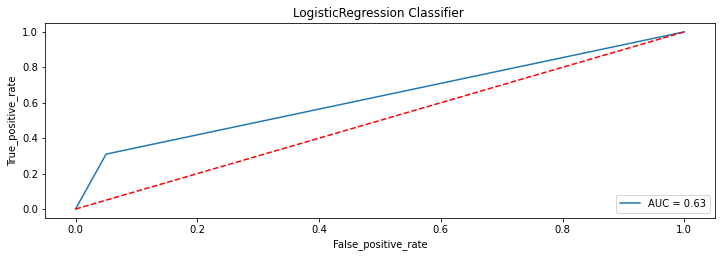

In [142]:
#Applying LogisticRegression Classifier 
r_state=mac_score(logr,x1,y)
logr=LogisticRegression(random_state=r_state)
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.20,stratify=y)
logr.fit(x_train,y_train)
ypred=logr.predict(x_test)
print("Results after applying LogisticRegression Classifier")
#Learning Score, F1 Score, Accuracy
print("Learning Score is",logr.score(x_train,y_train))
Lscore.append(logr.score(x_train,y_train))
print("F1 score is",metrics.f1_score(y_test,ypred))
fscore.append(metrics.f1_score(y_test,ypred))
print("Accuracy is",(round(logr.score(x_test,y_test)*100,2)),"%")
#accuracy score
acc_score=accuracy_score(y_test,ypred)
print('Accuracy Score is: ',acc_score)
Ascore.append(acc_score)
#cross validation score
cvscore=cross_val_score(logr,x1,y,cv=10,scoring='accuracy').mean()
print('Cross Validation Score is : ',cvscore)
Cvscore.append(cvscore)
#Log_Loss
logloss = log_loss(y_true = y_test, y_pred =ypred)
print('log_loss is : ',logloss)
Logloss.append(logloss)
#Roc auc score 
false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,ypred)
roc_auc=auc(false_positive_rate, true_positive_rate)
print('roc auc score is : ', roc_auc)
RAC.append(roc_auc)
print('Classification Report:\n',classification_report(y_test,ypred))
print('Confusion Matrix:\n',confusion_matrix(y_test,ypred))
plt.figure(figsize=(12,38))
plt.subplot(911)
plt.title('LogisticRegression Classifier ')
plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True_positive_rate')
plt.xlabel('False_positive_rate') 

Maximum Accuracy Score corresponding to Random State  96 is --> 0.8717576637039725 

Results after applying GradientBoostingClassifier
Learning Score is 0.8671988388969522
F1 score is 0.6654170571696344
Accuracy is 87.05 %
Accuracy Score is:  0.8704879376020316
Cross Validation Score is :  0.8655349123197688
log_loss is :  4.473216446121008
roc auc score is :  0.7660936221518714
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      4284
           1       0.78      0.58      0.67      1229

    accuracy                           0.87      5513
   macro avg       0.84      0.77      0.79      5513
weighted avg       0.86      0.87      0.86      5513

Confusion Matrix:
 [[4089  195]
 [ 519  710]]


Text(0.5, 0, 'False_positive_rate')

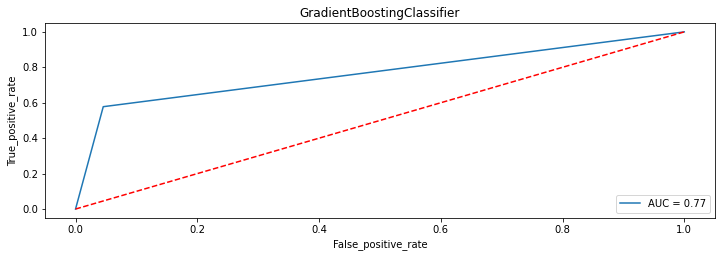

In [143]:
#Applying GradientBoostingClassifier
r_state=mac_score(grb,x1,y)
grb=GradientBoostingClassifier(n_estimators=100,random_state=r_state)
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.20,stratify=y)
grb.fit(x_train,y_train)
ypred=grb.predict(x_test)
print("Results after applying GradientBoostingClassifier")
#Learning Score, F1 Score, Accuracy
print("Learning Score is",grb.score(x_train,y_train))
Lscore.append(grb.score(x_train,y_train))
print("F1 score is",metrics.f1_score(y_test,ypred))
fscore.append(metrics.f1_score(y_test,ypred))
print("Accuracy is",(round(grb.score(x_test,y_test)*100,2)),"%")
#accuracy score
acc_score=accuracy_score(y_test,ypred)
print('Accuracy Score is: ',acc_score)
Ascore.append(acc_score)
#cross validation score
cvscore=cross_val_score(grb,x1,y,cv=10,scoring='accuracy').mean()
print('Cross Validation Score is : ',cvscore)
Cvscore.append(cvscore)
#Log_Loss
logloss = log_loss(y_true = y_test, y_pred =ypred)
print('log_loss is : ',logloss)
Logloss.append(logloss)
#Roc auc score 
false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,ypred)
roc_auc=auc(false_positive_rate, true_positive_rate)
print('roc auc score is : ', roc_auc)
RAC.append(roc_auc)
print('Classification Report:\n',classification_report(y_test,ypred))
print('Confusion Matrix:\n',confusion_matrix(y_test,ypred))
plt.figure(figsize=(12,38))
plt.subplot(911)
plt.title('GradientBoostingClassifier')
plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True_positive_rate')
plt.xlabel('False_positive_rate') 

# GridSearch CV

In [144]:
#using gridsearch CV to find the best parameters to use in k-nearest neighbors Classification. 
#kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="roc_auc")
clf.fit(x1,y)
clf.best_params_

{'n_neighbors': 29}

# k-nearest neighbors Classification 

Maximum Accuracy Score corresponding to Random State  51 is --> 0.8385633956103755 

Results after applying k-nearest neighbors Classification
Learning Score is 0.8466074020319303
F1 score is 0.5710344827586208
Accuracy is 83.08 %
Accuracy Score is:  0.8307636495555959
Cross Validation Score is :  0.8338594515714848
log_loss is :  5.845263603413112
roc auc score is :  0.714712586960469
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      4284
           1       0.66      0.51      0.57      1229

    accuracy                           0.83      5513
   macro avg       0.76      0.71      0.73      5513
weighted avg       0.82      0.83      0.82      5513

Confusion Matrix:
 [[3959  325]
 [ 608  621]]


Text(0.5, 0, 'False_positive_rate')

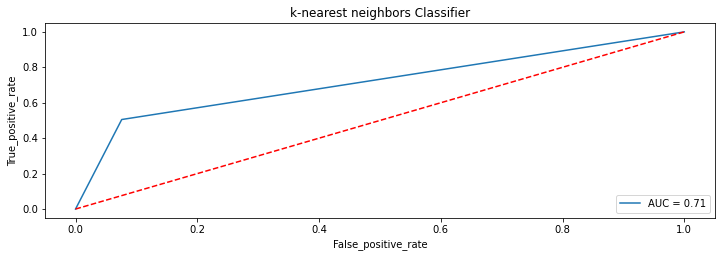

In [146]:
#Applying  k-nearest neighbors Classification 
r_state=mac_score(kc,x1,y)
kc=KNeighborsClassifier(n_neighbors=29)
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.20,stratify=y)
kc.fit(x_train,y_train)
ypred=kc.predict(x_test)
print("Results after applying k-nearest neighbors Classification")
#Learning Score, F1 Score, Accuracy
print("Learning Score is",kc.score(x_train,y_train))
Lscore.append(kc.score(x_train,y_train))
print("F1 score is",metrics.f1_score(y_test,ypred))
fscore.append(metrics.f1_score(y_test,ypred))
print("Accuracy is",(round(kc.score(x_test,y_test)*100,2)),"%")
#accuracy score
acc_score=accuracy_score(y_test,ypred)
print('Accuracy Score is: ',acc_score)
Ascore.append(acc_score)
#cross validation score
cvscore=cross_val_score(kc,x1,y,cv=10,scoring='accuracy').mean()
print('Cross Validation Score is : ',cvscore)
Cvscore.append(cvscore)
#Log_Loss
logloss = log_loss(y_true = y_test, y_pred =ypred)
print('log_loss is : ',logloss)
Logloss.append(logloss)
#Roc auc score 
false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,ypred)
roc_auc=auc(false_positive_rate, true_positive_rate)
print('roc auc score is : ', roc_auc)
RAC.append(roc_auc)
print('Classification Report:\n',classification_report(y_test,ypred))
print('Confusion Matrix:\n',confusion_matrix(y_test,ypred))
plt.figure(figsize=(12,38))
plt.subplot(911)
plt.title('k-nearest neighbors Classifier')
plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True_positive_rate')
plt.xlabel('False_positive_rate')

# GridSearch CV

In [147]:
#using gridsearch CV to find the best parameters to use in Support vector Classification. 
#svc=SVC()
parameters={"kernel":["linear", "poly"],"C":[0.01,0.1]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
clf.fit(x1,y)
clf.best_params_

{'C': 0.1, 'kernel': 'poly'}

Maximum Accuracy Score corresponding to Random State  58 is --> 0.8356611645202249 

Results after applying Support vector Classification
Learning Score is 0.8157202467343977
F1 score is 0.32240802675585284
Accuracy is 81.63 %
Accuracy Score is:  0.8162524941048431
Cross Validation Score is :  0.8149195635019029
log_loss is :  6.346417645198672
roc auc score is :  0.5951293590395204
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89      4284
           1       0.91      0.20      0.32      1229

    accuracy                           0.82      5513
   macro avg       0.86      0.60      0.61      5513
weighted avg       0.83      0.82      0.77      5513

Confusion Matrix:
 [[4259   25]
 [ 988  241]]


Text(0.5, 0, 'False_positive_rate')

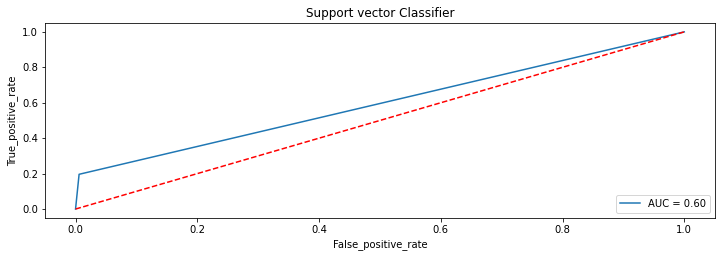

In [148]:
#Applying Support vector Classification
r_state=mac_score(svc,x1,y)
svc=SVC(kernel="poly",C=0.1)
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.20,stratify=y)
svc.fit(x_train,y_train)
ypred=svc.predict(x_test)
print("Results after applying Support vector Classification")
#Learning Score, F1 Score, Accuracy
print("Learning Score is",svc.score(x_train,y_train))
Lscore.append(svc.score(x_train,y_train))
print("F1 score is",metrics.f1_score(y_test,ypred))
fscore.append(metrics.f1_score(y_test,ypred))
print("Accuracy is",(round(svc.score(x_test,y_test)*100,2)),"%")
#accuracy score
acc_score=accuracy_score(y_test,ypred)
print('Accuracy Score is: ',acc_score)
Ascore.append(acc_score)
#cross validation score
cvscore=cross_val_score(svc,x1,y,cv=10,scoring='accuracy').mean()
print('Cross Validation Score is : ',cvscore)
Cvscore.append(cvscore)
#Log_Loss
logloss = log_loss(y_true = y_test, y_pred =ypred)
print('log_loss is : ',logloss)
Logloss.append(logloss)
#Roc auc score 
false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,ypred)
roc_auc=auc(false_positive_rate, true_positive_rate)
print('roc auc score is : ', roc_auc)
RAC.append(roc_auc)
print('Classification Report:\n',classification_report(y_test,ypred))
print('Confusion Matrix:\n',confusion_matrix(y_test,ypred))
plt.figure(figsize=(12,38))
plt.subplot(911)
plt.title('Support vector Classifier')
plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True_positive_rate')
plt.xlabel('False_positive_rate')

Maximum Accuracy Score corresponding to Random State  46 is --> 0.8670415381824778 

Results after applying AdaBoostClassifier
Learning Score is 0.8624818577648766
F1 score is 0.6672653794342165
Accuracy is 86.56 %
Accuracy Score is:  0.8655904226374025
Cross Validation Score is :  0.8629588333799226
log_loss is :  4.642379322687016
roc auc score is :  0.772516370258437
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      4284
           1       0.74      0.60      0.67      1229

    accuracy                           0.87      5513
   macro avg       0.82      0.77      0.79      5513
weighted avg       0.86      0.87      0.86      5513

Confusion Matrix:
 [[4029  255]
 [ 486  743]]


Text(0.5, 0, 'False_positive_rate')

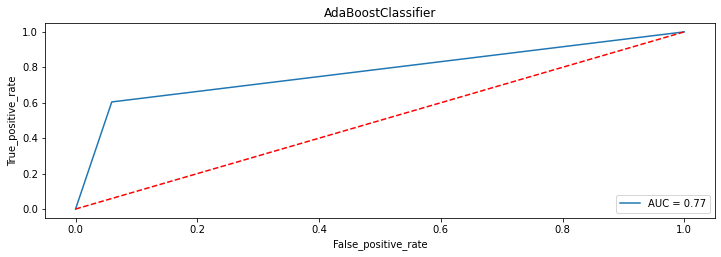

In [149]:
#Applying AdaBoostClassifier
r_state=mac_score(adb,x1,y)
adb=AdaBoostClassifier(n_estimators=100,random_state=r_state)
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.20,stratify=y)
adb.fit(x_train,y_train)
ypred=adb.predict(x_test)
print("Results after applying AdaBoostClassifier")
#Learning Score, F1 Score, Accuracy
print("Learning Score is",adb.score(x_train,y_train))
Lscore.append(adb.score(x_train,y_train))
print("F1 score is",metrics.f1_score(y_test,ypred))
fscore.append(metrics.f1_score(y_test,ypred))
print("Accuracy is",(round(adb.score(x_test,y_test)*100,2)),"%")
#accuracy score
acc_score=accuracy_score(y_test,ypred)
print('Accuracy Score is: ',acc_score)
Ascore.append(acc_score)
#cross validation score
cvscore=cross_val_score(adb,x1,y,cv=10,scoring='accuracy').mean()
print('Cross Validation Score is : ',cvscore)
Cvscore.append(cvscore)
#Log_Loss
logloss = log_loss(y_true = y_test, y_pred =ypred)
print('log_loss is : ',logloss)
Logloss.append(logloss)
#Roc auc score 
false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,ypred)
roc_auc=auc(false_positive_rate, true_positive_rate)
print('roc auc score is : ', roc_auc)
RAC.append(roc_auc)
print('Classification Report:\n',classification_report(y_test,ypred))
print('Confusion Matrix:\n',confusion_matrix(y_test,ypred))
plt.figure(figsize=(12,38))
plt.subplot(911)
plt.title('AdaBoostClassifier')
plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True_positive_rate')
plt.xlabel('False_positive_rate') 

In [150]:
#Combining all scores in one place to decide best one model
top=pd.DataFrame({})
top['Model']=model
top['Learning Score']=Lscore
top['Accuracy Score']=Ascore
top['Cross Validation Score']=Cvscore
top['F1 Score']=fscore
top['Roc_Auc_curve']=RAC
top['Log Loss']=Logloss
top

,Model,Learning Score,Accuracy Score,Cross Validation Score,F1 Score,Roc_Auc_curve,Log Loss
0,RandomForest Classifier,0.999909,0.854888,0.853162,0.630314,0.747933,5.012012
1,DecisionTree Classifier,0.999955,0.818429,0.805667,0.594901,0.739850,6.271308
2,LogisticRegression Classifier,0.804744,0.807183,0.805450,0.417534,0.629911,6.659694
3,GradientBoosting Classifier,0.867199,0.870488,0.865535,0.665417,0.766094,4.473216
4,KNeighborsClassifier,0.846607,0.830764,0.833859,0.571034,0.714713,5.845264
5,Support Vector Classifier,0.815720,0.816252,0.814920,0.322408,0.595129,6.346418
6,AdaBoost Classifier,0.862482,0.865590,0.862959,0.667265,0.772516,4.642379


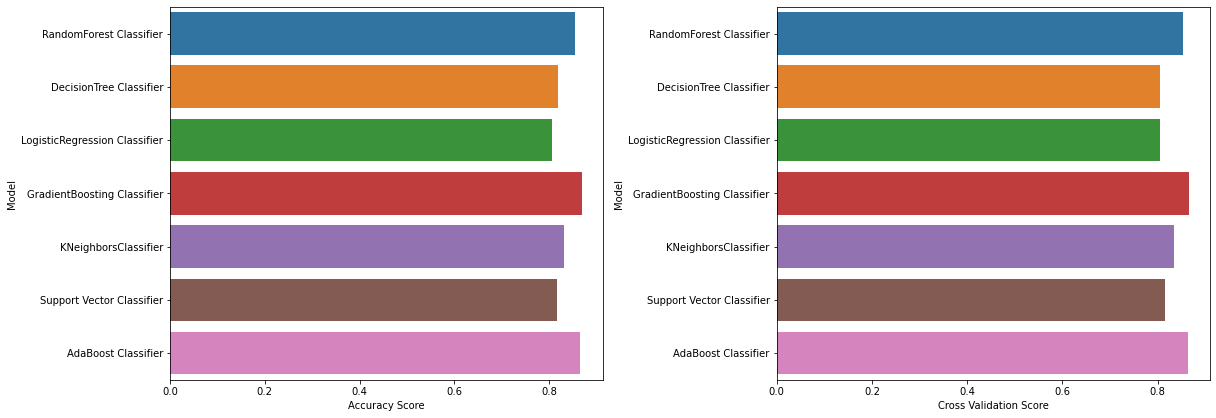

In [151]:
#Plotting bar plot of acc scores and cv scores of various models
plt.figure(figsize=(17,17))

plt.subplot(3,2,1)
sns.barplot(x = 'Accuracy Score', y = 'Model', data = top)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross Validation Score', y = 'Model', data = top)
plt.tight_layout()
plt.show()

Observations:-

1-After comparing above 7 models on basis of Learning Score,Accuracy Score,Cross Validation Score,F1 Score, Roc_Auc_curve & Log Loss parameters GradientBoosting Classifier gives best result.

2- We will use GridsearchCV to find best parameters.

# Hyperparameter Tuning using GridSearch CV

In [152]:
#usimg gridsearch CV to find best parameters for Gradient Boosting classifier
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,cv=5)
tuning.fit(x_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.01, 'n_estimators': 1750}, 0.86592883346731)

In [153]:
#finding best random state for GradientBoosting model finalization
r_state=mac_score(grb,x1,y)

Maximum Accuracy Score corresponding to Random State  96 is --> 0.8717576637039725 



# Implementing GradientBoosting Classifier using best parameters

In [154]:
#Function to calculate accuracy,precision,recall and f1 score For our Final Model
def final_calc(y_true, y_pred1):
    accuracy = accuracy_score(y_true, y_pred1)
    precision = precision_score(y_true, y_pred1)
    recall = recall_score(y_true, y_pred1)
    f1 = f1_score(y_true, y_pred1)
    log_loss = metrics.log_loss(y_true, y_pred1)

    final_metric = {"accuracy": round(accuracy, 2),
                   "Precision": round(precision, 2), 
                   "Recall": round(recall, 2),
                   "F1 Score": round(f1, 2)}
    print("Accuracy is:", round(accuracy, 2) * 100,"%")
    print("Precision is:", round(precision, 2))
    print("Recall is:" ,round(recall, 2))
    print("F1 score is:" ,round(f1, 2))
    print("Log Loss is :", log_loss)

    return final_metric

In [155]:
#lets make our final model using GradientBoosting Classifier
#best scores obtained for GradientBoosting Classifier model at random_state 96
x_train,x_test,y_train,y_test=train_test_split(x1, y,random_state = 96,test_size=0.20,stratify=y)
gbc=GradientBoostingClassifier(learning_rate=0.01, n_estimators=1750,max_depth=4, min_samples_split=2, min_samples_leaf=1,max_features='sqrt')
gbc.fit(x_train,y_train)
gbc_pred=gbc.predict(x_test)
final_calc(y_test,gbc_pred)

Accuracy is: 87.0 %
Precision is: 0.76
Recall is: 0.6
F1 score is: 0.67
Log Loss is : 4.492016430720099


{'accuracy': 0.87, 'Precision': 0.76, 'Recall': 0.6, 'F1 Score': 0.67}

In [156]:
#Confusion Matrix & Classification Report for final Model
print("Confusion matrix is as :- \n",confusion_matrix(y_test,gbc_pred))
print("\nclassification report \n",classification_report(y_test,gbc_pred))
print('ROC AUC Score is :\n ', roc_auc_score(y_test,gbc_pred))

Confusion matrix is as :- 
 [[4054  230]
 [ 487  742]]

classification report 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      4284
           1       0.76      0.60      0.67      1229

    accuracy                           0.87      5513
   macro avg       0.83      0.78      0.80      5513
weighted avg       0.86      0.87      0.86      5513

ROC AUC Score is :
  0.7750273692335626


# Evaluating Predictions

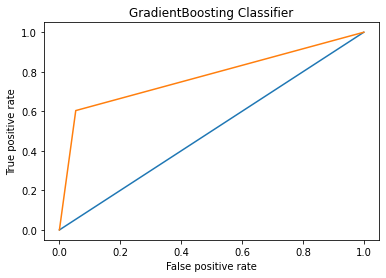

roc_auc_score =  0.7750273692335626


In [157]:
#Predictions with Gradient Boosting Classifier
y_prob = gbc.predict(x_test)
# Calculating false positive rate,true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# Checking false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='GradientBoosting Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoosting Classifier')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_prob))

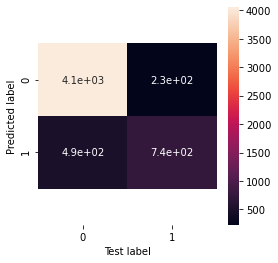

In [158]:
#Confusion matrix using Heatmap for Predicted & Test Labels 
def plotcm(y_test, gbc_pred):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(confusion_matrix(y_test, gbc_pred),annot=True)
    plt.xlabel("Test label")
    plt.ylabel("Predicted label")
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plotcm(y_test, gbc_pred)

In [161]:
#Now check & print predicted values
result1=pd.DataFrame(data=y_test)
result1['Predicted values']=gbc_pred
result1

,Income,Predicted values
12626,0,0
19980,0,0
10594,0,0
20112,0,0
7103,1,1
...,...,...
25086,1,1
9486,0,0
24365,1,0
6807,0,1


In [163]:
#lets make the dataframe for Predictions using Pandas
predict=pd.DataFrame(gbc_pred,columns=['Predicted Values'])
predict=pd.concat([predict,y_test.reset_index()['Income']],axis=1)
predict.columns=['Predicted Values','Real Values']
#Comparing predicted and real values
predict.round(2)

,Predicted Values,Real Values
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
5508,1,1
5509,0,0
5510,0,1
5511,1,0


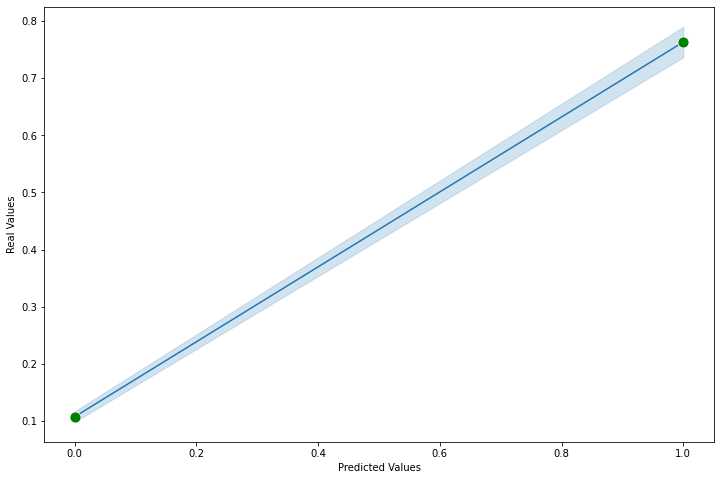

In [164]:
#Graph showing how close are predicted and Real Values
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(12,8))
sns.lineplot(x='Predicted Values',y='Real Values',data=predict,ax=ax,marker='o',markerfacecolor='green',markersize=11)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Real Values')
plt.show()

Conclusion:

1-Above Plot shows Predicted values are very close to real values.

2- Gradient Boosting Classifier is best algorithm for our Project.

# Saving our model

In [165]:
import joblib
#saving model
joblib.dump(gbc,'Census Income Project.pkl')

['Census Income Project.pkl']

# Loading the saved model

In [166]:
gbc_from_joblib=joblib.load('Census Income Project.pkl')
joblib_y_pred = gbc_from_joblib.predict(x_test)
final_calc(y_test, joblib_y_pred)

Accuracy is: 87.0 %
Precision is: 0.76
Recall is: 0.6
F1 score is: 0.67
Log Loss is : 4.492016430720099


{'accuracy': 0.87, 'Precision': 0.76, 'Recall': 0.6, 'F1 Score': 0.67}

In [167]:
#checking predicted values
print(joblib_y_pred)

[0 0 0 ... 0 1 0]


Result is OK as per our model.

# ||HAPPY ENDING||